# Data Representation in Scikit-Learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer. The best way to think about data within Scikit-Learn is in terms of tables of data.

## Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
np.unique(iris['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as ```samples```, and the number of rows as ```n_sample```.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as ```feature```, and the number of columns as ```n_features```.

### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the
```features matrix```. Usually denoted as ```X```.

The samples (i.e., rows) always refer to the individual objects described by the dataset. The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.

### Target array

In addition to the feature matrix, we also generally work with a label or ```target array```. Usually denoted as ```Y```. 

The target array may have continuous numerical values, or discrete classes/labels.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable

For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ```species``` column would be considered the target array.

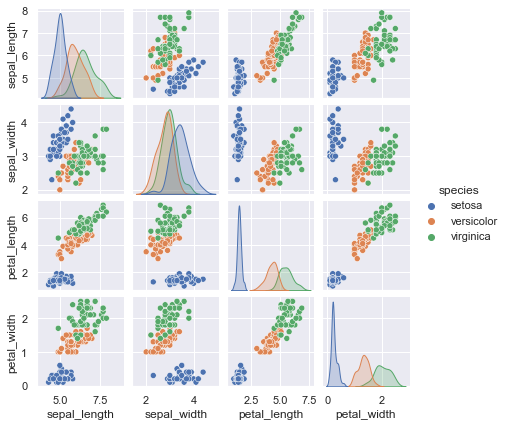

In [4]:
sns.pairplot(iris,hue='species',height=1.5)

We will drop the species column from the DataFrame. To construct the features matrix and target arrays.

In [5]:
# Features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
# Target array
y_iris = iris['species']
y_iris.shape

(150,)

# Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the Scikit-Learn API paper:

- Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- Inspection: All specified parameter values are exposed as public attributes.

- Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.
- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

- Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

## Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
 - For supervised learning, often we predict labels for unknown data using the predict() method.
 - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

## Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x,y)$
data. We will use the following simple data for our regression example:

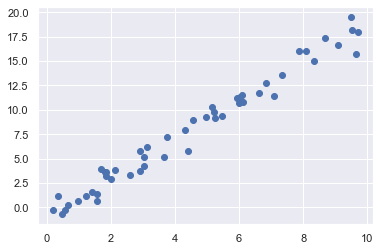

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

**1. Choose a class of model**

In [8]:
from sklearn.linear_model import LinearRegression

**2. Choose model hyperparameters**

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected.

These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. 

In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters in Hyperparameters and Model Validation.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

**3. Arrange data into a features matrix and target vector**

We need to restructure the data ```x``` to make it a matrix of size [```n_samples```, ```n_features```]. In this case $n_{samples}=50$ and $n_{features}=1$.

In [19]:
x.shape

(50,)

In [15]:
X = x[:, None] # Equivalent to x[:,np.newaxis]
X.shape

(50, 1)

```y``` is already in the form of (a length-```n_samples``` array).

In [18]:
y.shape

(50,)

**4. Fit the model to your data**

In [20]:
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. 

In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores.

In [21]:
model.coef_

array([1.9776566])

In [22]:
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

**5. Predict labels for unknown data**

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.

In [23]:
# Untrained values of data
xfit = np.linspace(-1, 11)

In [25]:
# Uses scikit-learn predict method.
Xfit = xfit[:, None] # Reshape array
yfit = model.predict(Xfit)

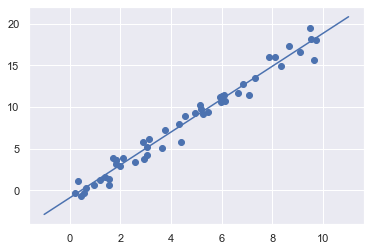

In [26]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning example: Iris classification

Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.

Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function

In [37]:
from sklearn.model_selection import train_test_split
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
 

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [38]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

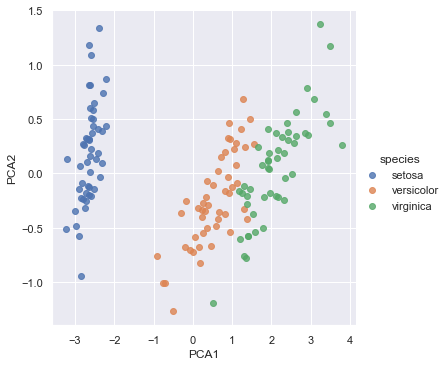

In [43]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

# Unsupervised learning: Iris clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels. 

Here we will use a powerful clustering method called a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.



In [50]:
from sklearn.mixture import GaussianMixture as GM     # 1. Choose the model class
model = GM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gm = model.predict(X_iris)        # 4. Determine cluster labels

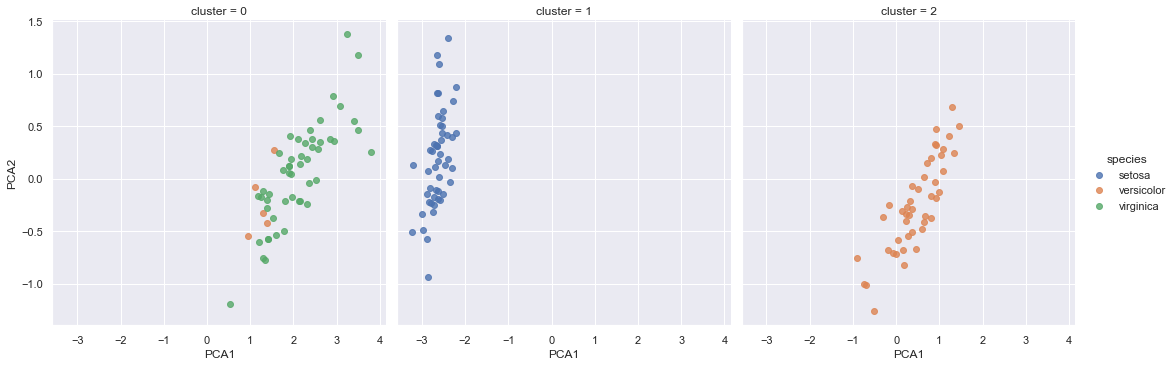

In [51]:
iris['cluster'] = y_gm
sns.lmplot(x="PCA1",y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. 

This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! 

This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

# Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits. 

In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

## Loading and visualizing the digits data

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

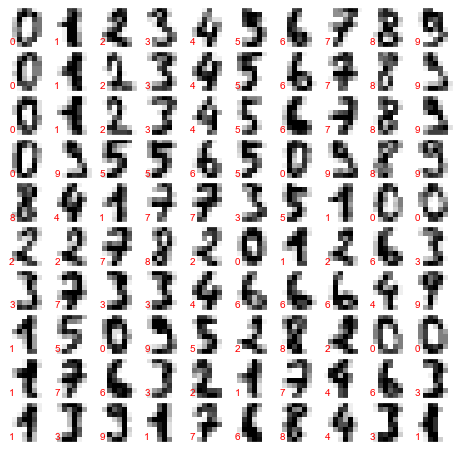

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='red')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [```n_samples```, ```n_features```] representation. 

We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. 

Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the ```data``` and ```target``` attributes, respectively:

In [63]:
X = digits.data
X.shape

(1797, 64)

In [67]:
y = digits.target
y.shape

(1797,)

## Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimensions to 2, using an unsupervised method. 

Here, we'll make use of a manifold learning algorithm called ```Isomap```.

In [68]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

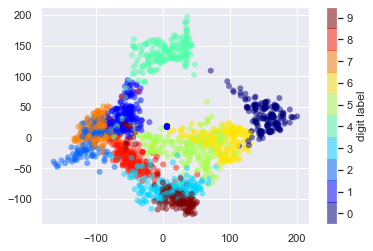

In [79]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## Classification on digits

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [81]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn.

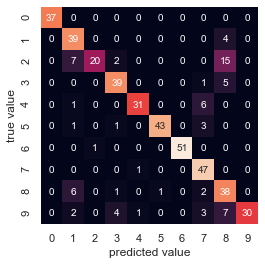

In [88]:
from sklearn.metrics import confusion_matrix 

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

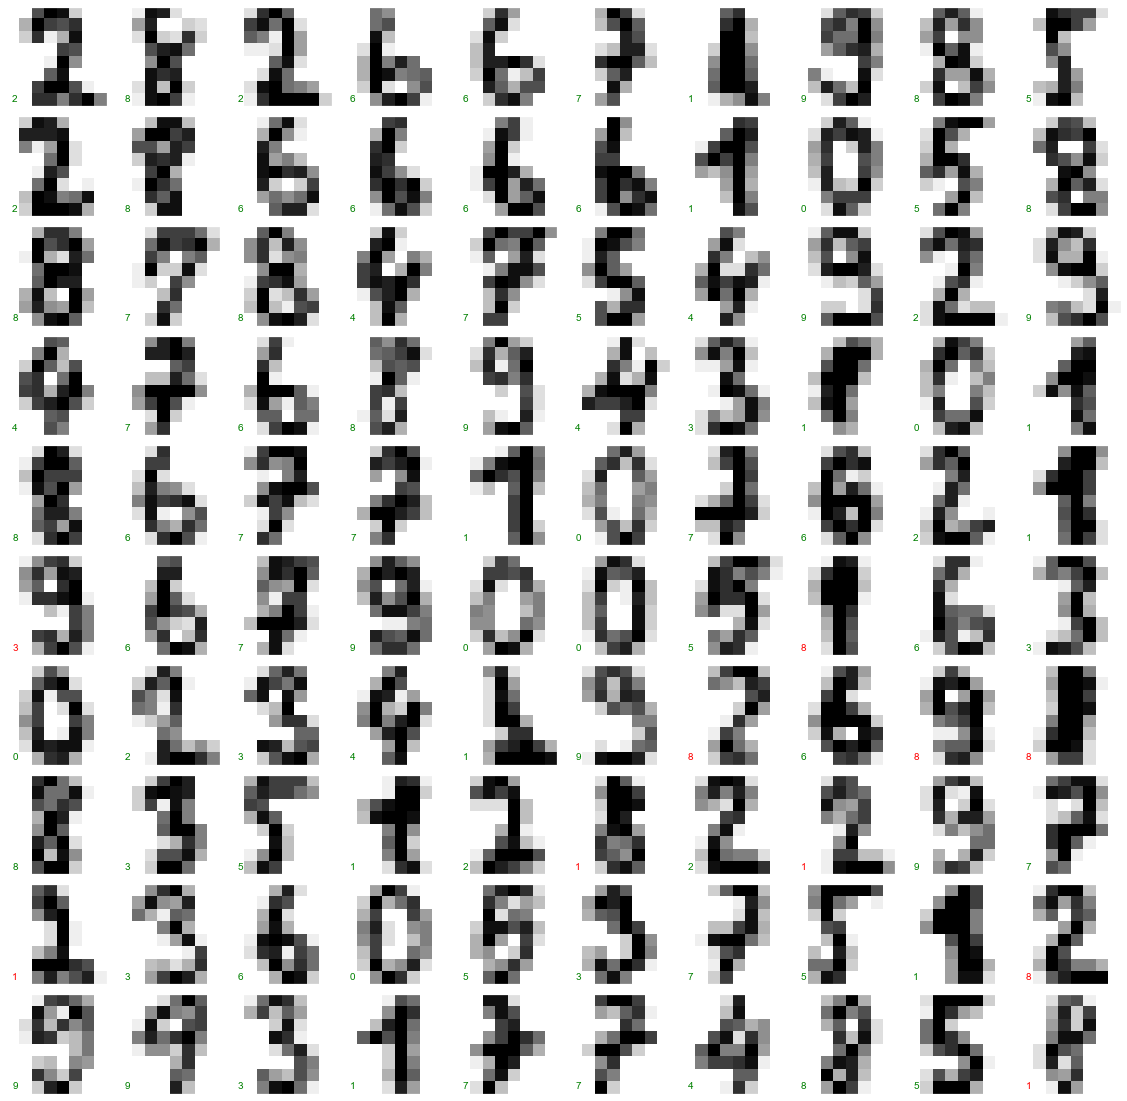

In [90]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')